In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
data_path = r'archive\heart.csv'

In [37]:
# read data
df = pd.read_csv(data_path)


In [38]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [40]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


after describe we find out ther are unrealistic 0s , so we will replace them with NAN

In [41]:
# Replace unrealistic 0s with NaN
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

# Replace negative Oldpeak with NaN
df['Oldpeak'] = df['Oldpeak'].apply(lambda x: np.nan if x < 0 else x)

print("Unreasonable values replaced with NaN")


Unreasonable values replaced with NaN


In [42]:
# check num of missing values
print(" Missing values after cleaning:")
df.isna().sum()


 Missing values after cleaning:


Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak            13
ST_Slope            0
HeartDisease        0
dtype: int64

In [43]:

# Fill missing values with median (no inplace=True to avoid warnings)
df['RestingBP'] = df['RestingBP'].fillna(df['RestingBP'].median())
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())
df['Oldpeak'] = df['Oldpeak'].fillna(df['Oldpeak'].median())

print(" Missing values filled using median.")

 Missing values filled using median.


In [44]:
print("🧪 Checking for remaining missing values:")
df.isna().sum()


🧪 Checking for remaining missing values:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [46]:
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    print(f"{col} unique values:", df[col].unique())


Sex unique values: ['M' 'F']
ChestPainType unique values: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG unique values: ['Normal' 'ST' 'LVH']
ExerciseAngina unique values: ['N' 'Y']
ST_Slope unique values: ['Up' 'Flat' 'Down']


Encode categorical columns

In [47]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform
encoded_categorical = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Reset index to match df
encoded_categorical_df.reset_index(drop=True, inplace=True)

print(" After One-Hot Encoding:")
encoded_categorical_df.head()



 After One-Hot Encoding:


,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


Standardization numerical columns

In [48]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# StandardScaler
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_cols])
# convert matrix to df
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_cols)
print("After standardization")
scaled_numerical_df.head()

After standardization


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,-1.433140,0.415002,0.858035,-0.551341,1.382928,-0.875154
1,-0.478484,1.527329,-1.184227,-0.551341,0.754157,0.086761
2,-1.751359,-0.141161,0.745617,-0.551341,-1.525138,-0.875154
3,-0.584556,0.303769,-0.547191,-0.551341,-1.132156,0.567718
4,0.051881,0.971166,-0.903182,-0.551341,-0.581981,-0.875154


In [49]:
scaled_numerical_df.reset_index(drop=True, inplace=True)
encoded_categorical_df.reset_index(drop=True, inplace=True)
target_df = df[['HeartDisease']].reset_index(drop=True)

final_df = pd.concat([scaled_numerical_df, encoded_categorical_df, target_df], axis=1)


final_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.433140,0.415002,0.858035,-0.551341,1.382928,-0.875154,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,-0.478484,1.527329,-1.184227,-0.551341,0.754157,0.086761,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,-1.751359,-0.141161,0.745617,-0.551341,-1.525138,-0.875154,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
3,-0.584556,0.303769,-0.547191,-0.551341,-1.132156,0.567718,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,0.051881,0.971166,-0.903182,-0.551341,-0.581981,-0.875154,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [50]:
print(" Data type summary:")
final_df.dtypes


 Data type summary:


Age                  float64
RestingBP            float64
Cholesterol          float64
FastingBS            float64
MaxHR                float64
Oldpeak              float64
Sex_F                float64
Sex_M                float64
ChestPainType_ASY    float64
ChestPainType_ATA    float64
ChestPainType_NAP    float64
ChestPainType_TA     float64
RestingECG_LVH       float64
RestingECG_Normal    float64
RestingECG_ST        float64
ExerciseAngina_N     float64
ExerciseAngina_Y     float64
ST_Slope_Down        float64
ST_Slope_Flat        float64
ST_Slope_Up          float64
HeartDisease           int64
dtype: object

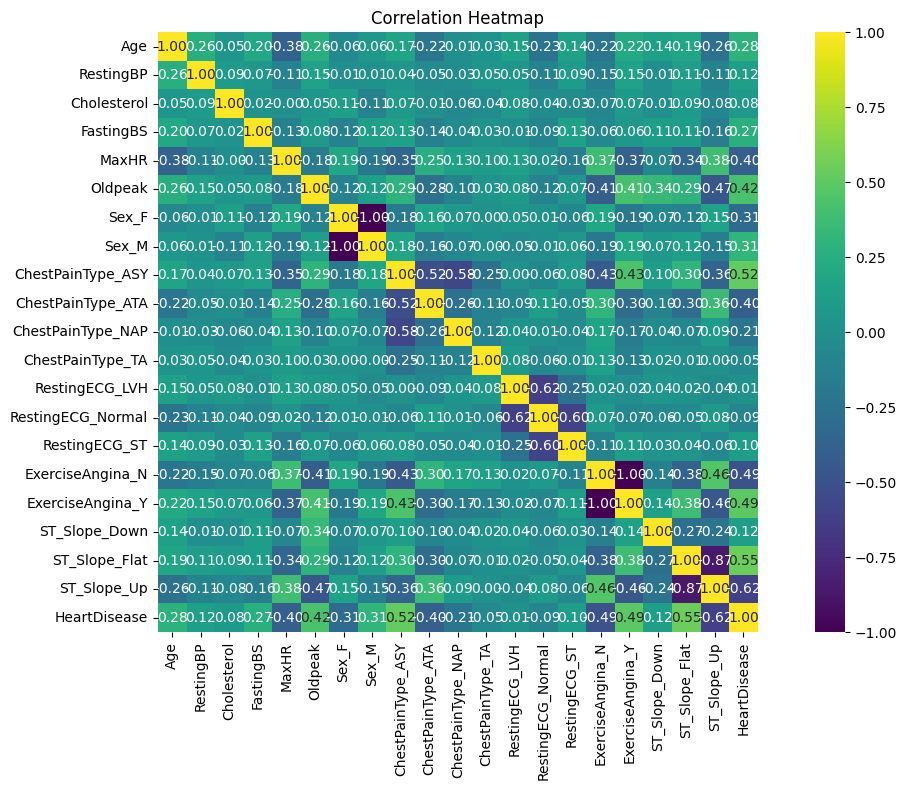

In [51]:
plt.figure(figsize=(12, 8)) 
corr = final_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', square=True)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

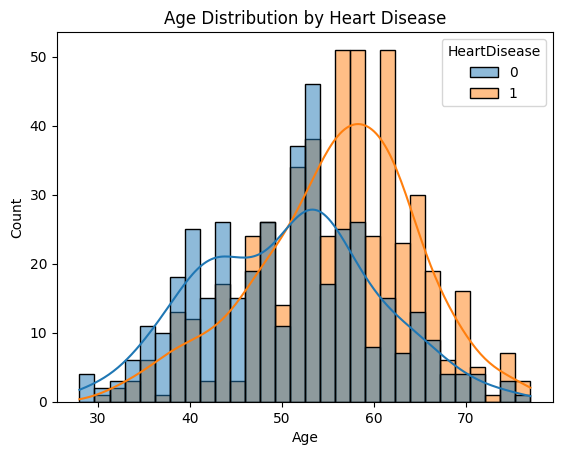

In [52]:
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, bins=30)
plt.title('Age Distribution by Heart Disease')
plt.show()


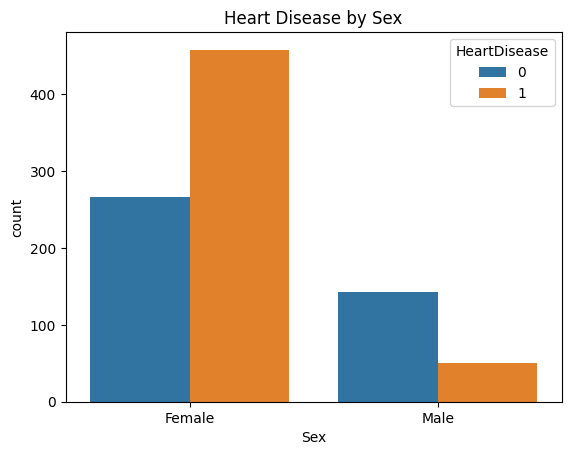

In [53]:
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Heart Disease by Sex')
plt.xticks([0,1], ['Female', 'Male'])
plt.show()


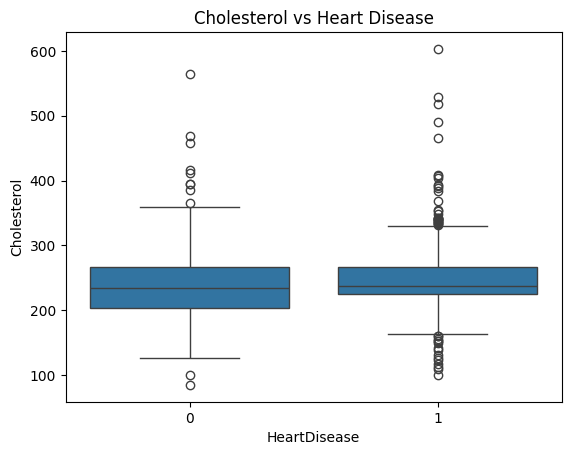

In [54]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title('Cholesterol vs Heart Disease')
plt.show()


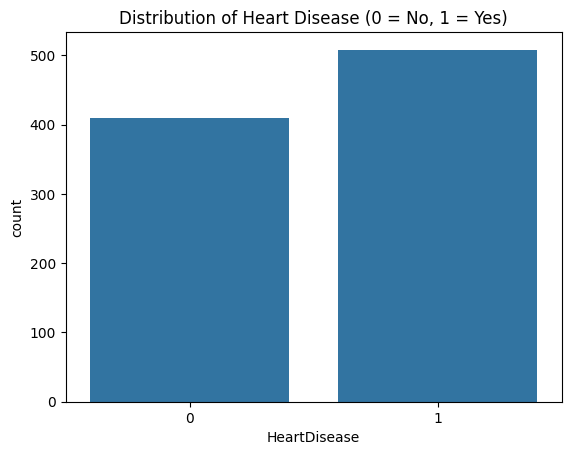

In [55]:
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.show()

In [57]:
final_df.to_csv("heart_cleaned_preprocessed.csv", index=False)
print("File saved as 'heart_cleaned_preprocessed.csv'")


File saved as 'heart_cleaned_preprocessed.csv'


----------------------------------------------------------------------------------------------

In [127]:

df_check = pd.read_csv("heart_cleaned_preprocessed.csv")
df_check.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.433140,0.415002,0.858035,-0.551341,1.382928,-0.875154,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,-0.478484,1.527329,-1.184227,-0.551341,0.754157,0.086761,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,-1.751359,-0.141161,0.745617,-0.551341,-1.525138,-0.875154,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
3,-0.584556,0.303769,-0.547191,-0.551341,-1.132156,0.567718,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,0.051881,0.971166,-0.903182,-0.551341,-0.581981,-0.875154,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


feature selection using f_classif

In [128]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target variable
X = final_df.drop('HeartDisease', axis=1)
y = final_df['HeartDisease']

# Select top 10 features based on statistical test (ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=10)
X_stat_selected = selector.fit_transform(X, y)

# Get the names of selected features
stat_selected_features = X.columns[selector.get_support()]
print("Statistical Selected Features:", stat_selected_features.tolist())
print("Shape:", X_stat_selected.shape)


Statistical Selected Features: ['MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']
Shape: (918, 10)


Feature Selection using Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Train a RandomForestClassifier to evaluate feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance scores
importances = model.feature_importances_

# Sort features by importance in descending order
indices = np.argsort(importances)[::-1]

# Select top 10 most important features
top_n = 10
model_selected_features = X.columns[indices[:top_n]]
print("Model-Based Selected Features:", model_selected_features.tolist())


Model-Based Selected Features: ['ST_Slope_Up', 'Oldpeak', 'MaxHR', 'ST_Slope_Flat', 'ChestPainType_ASY', 'Cholesterol', 'Age', 'RestingBP', 'ExerciseAngina_N', 'ExerciseAngina_Y']


In [130]:
selected_features = [
    'ST_Slope_Up',
    'Oldpeak',
    'MaxHR',
    'ST_Slope_Flat',
    'ChestPainType_ASY',
    'Cholesterol',
    'Age',
    'RestingBP',
    'ExerciseAngina_N',
    'ExerciseAngina_Y'
]


PCA


In [131]:
from sklearn.decomposition import PCA

# Define selected features (from model-based selection)
selected_features = [
    'ST_Slope_Up',
    'Oldpeak',
    'MaxHR',
    'ST_Slope_Flat',
    'ChestPainType_ASY',
    'Cholesterol',
    'Age',
    'RestingBP',
    'ExerciseAngina_N',
    'ExerciseAngina_Y'
]

# Input features and target variable
X = final_df[selected_features]
y = final_df['HeartDisease']

# Initialize PCA 
pca = PCA()
X_pca_full = pca.fit_transform(X)



In [132]:
# Explained variance ratio tells us how much variance each component explains
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance to decide how many components to keep
cumulative_variance = explained_variance_ratio.cumsum()

# Print explained variance ratio for each component
for i, var in enumerate(cumulative_variance):
    print(f"PCA Component {i+1}: Cumulative Variance = {var:.4f}")


PCA Component 1: Cumulative Variance = 0.3210
PCA Component 2: Cumulative Variance = 0.4863
PCA Component 3: Cumulative Variance = 0.6343
PCA Component 4: Cumulative Variance = 0.7704
PCA Component 5: Cumulative Variance = 0.8714
PCA Component 6: Cumulative Variance = 0.9249
PCA Component 7: Cumulative Variance = 0.9684
PCA Component 8: Cumulative Variance = 0.9957
PCA Component 9: Cumulative Variance = 1.0000
PCA Component 10: Cumulative Variance = 1.0000


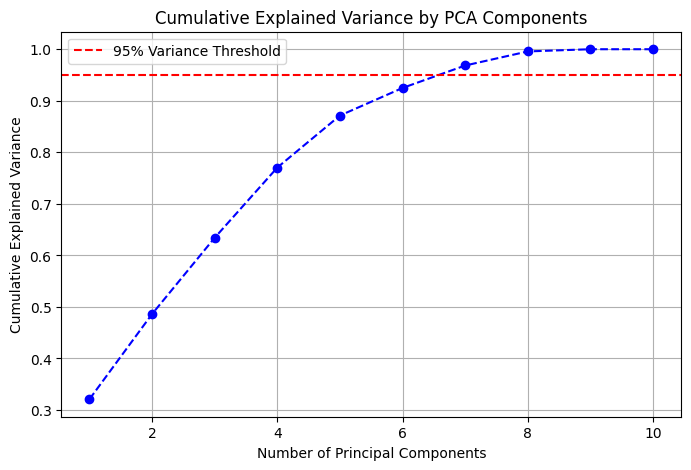

In [133]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.show()


7 component give 95%

In [134]:
from sklearn.decomposition import PCA
import pandas as pd

# Define the selected features (from Random Forest selection)
selected_features = [
    'ST_Slope_Up',
    'Oldpeak',
    'MaxHR',
    'ST_Slope_Flat',
    'ChestPainType_ASY',
    'Cholesterol',
    'Age',
    'RestingBP',
    'ExerciseAngina_N',
    'ExerciseAngina_Y'
]

# Prepare the input features and target
X = final_df[selected_features]
y = final_df['HeartDisease']

# Apply PCA with 7 components (as determined from variance plot)
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)

# Convert result to DataFrame
pca_columns = [f'PCA_{i+1}' for i in range(7)]
df_pca_7 = pd.DataFrame(X_pca, columns=pca_columns)

# Optional: add the target column for modeling
df_pca_final = pd.concat([df_pca_7, y.reset_index(drop=True)], axis=1)

# Display first few rows
df_pca_final.head()


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,HeartDisease
0,-2.022851,1.525047,0.293753,0.252358,-0.457495,-0.153884,-0.100240,0
1,-0.279213,-0.089516,1.502438,1.334105,-0.608614,0.144097,1.016423,1
2,-0.964750,0.261682,-0.391661,-1.347124,-1.636903,-1.447461,-0.098277,0
3,1.060658,-0.779692,-0.391278,0.270019,-1.310994,0.089360,-0.058981,1
4,-0.353350,-0.471182,1.676384,-0.470989,-0.414225,-0.662812,-0.100705,0


Split the dataset into training (80%) and testing (20%)

In [135]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_pca_final.drop('HeartDisease', axis=1)
y = df_pca_final['HeartDisease']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data split completed.")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Data split completed.
Training shape: (734, 7)
Testing shape: (184, 7)


LogisticRegression

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Predict on test data
y_pred = log_model.predict(X_test)

# Print classification report
print(" Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix (as plain matrix)
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.4f}")


 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        77
           1       0.88      0.77      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.82      0.80      0.81       184

 Confusion Matrix:
[[66 11]
 [25 82]]
 Accuracy: 0.8043


ROC Curve-Logistic Regression

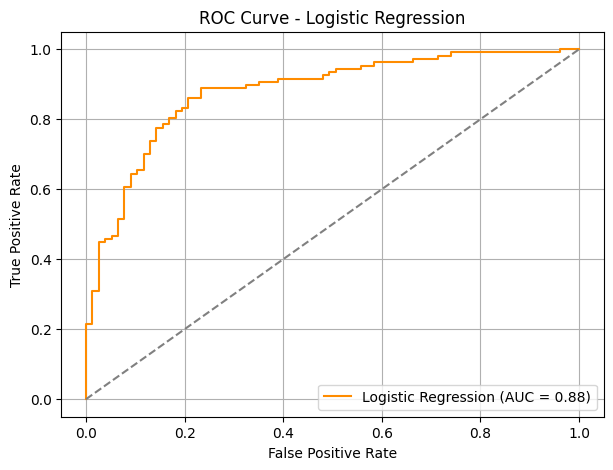

In [137]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (label 1)
y_probs = log_model.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


DecisionTree

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score


# 1. Initialize and train Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 2. Predict on test data
y_pred_tree = tree_model.predict(X_test)

# 3. Evaluation metrics

# Classification report
print(" Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_tree))

# Confusion matrix
print(" Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_tree))

# Accuracy
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print(f" Accuracy (Decision Tree): {tree_accuracy:.4f}")


 Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        77
           1       0.81      0.74      0.77       107

    accuracy                           0.75       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.76      0.75      0.75       184

 Confusion Matrix (Decision Tree):
[[59 18]
 [28 79]]
 Accuracy (Decision Tree): 0.7500


 Hyperparameter Tuning For DecisionTree Using GridSearch

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
tree = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Show best parameters and score
print(" Best Parameters:")
print(grid_search.best_params_)

print(f" Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


 Best Parameters:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
 Best Cross-Validation Accuracy: 0.7902


DecisionTree After Tunning

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score


# 1. Initialize and train Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42,criterion='gini', max_depth= 3, min_samples_leaf= 4, min_samples_split= 2)
tree_model.fit(X_train, y_train)

# 2. Predict on test data
y_pred_tree = tree_model.predict(X_test)

# 3. Evaluation metrics

# Classification report
print(" Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_tree))

# Confusion matrix
print(" Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_tree))

# Accuracy
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print(f" Accuracy (Decision Tree): {tree_accuracy:.4f}")


 Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        77
           1       0.79      0.83      0.81       107

    accuracy                           0.78       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184

 Confusion Matrix (Decision Tree):
[[54 23]
 [18 89]]
 Accuracy (Decision Tree): 0.7772


ROC Curve -  Decision Tree

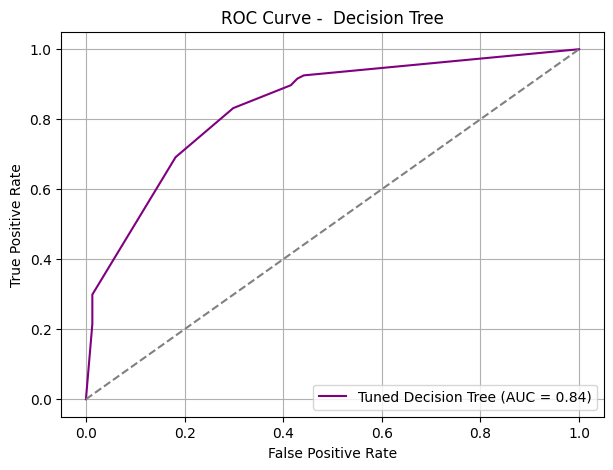

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1)
y_probs_best_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute FPR, TPR for ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_best_tree)

# Compute AUC
auc_score = roc_auc_score(y_test, y_probs_best_tree)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Tuned Decision Tree (AUC = {auc_score:.2f})", color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve -  Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


RandomForest

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Classification report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print(" Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f" Accuracy (Random Forest): {rf_accuracy:.4f}")


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        77
           1       0.88      0.82      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184

 Confusion Matrix (Random Forest):
[[65 12]
 [19 88]]
 Accuracy (Random Forest): 0.8315


Hyperparameter Tuning For RandomForest Using RandomizedSearch 

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Base model
rf_model = RandomForestClassifier(random_state=42)

# Define parameter distribution
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,  # number of combinations to try
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Print best parameters and score
print(" Best Parameters (Randomized Search):")
print(random_search.best_params_)

print(f"Best CV Accuracy: {random_search.best_score_:.4f}")


 Best Parameters (Randomized Search):
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 299}
Best CV Accuracy: 0.8460


RandomForest After Tunning

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42,criterion='entropy', max_depth= 5, min_samples_leaf= 4, min_samples_split= 10, n_estimators=99)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Classification report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print(" Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f" Accuracy (Random Forest): {rf_accuracy:.4f}")


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        77
           1       0.88      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184

 Confusion Matrix (Random Forest):
[[65 12]
 [16 91]]
 Accuracy (Random Forest): 0.8478


ROC Curve - Random Forest

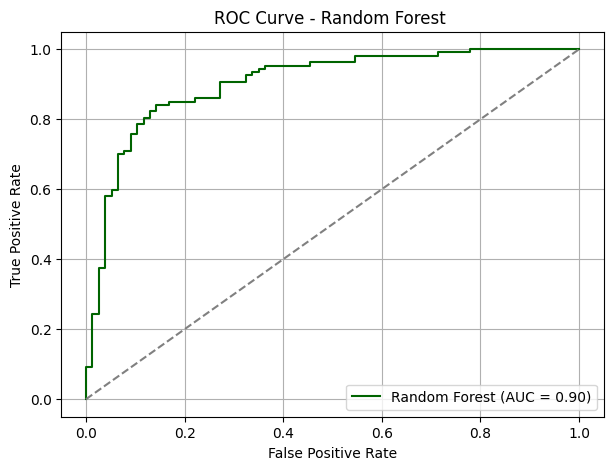

In [145]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get probabilities for class 1
best_rf_random = random_search.best_estimator_

y_probs_rf = best_rf_random.predict_proba(X_test)[:, 1]

# Compute FPR, TPR
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)

# Compute AUC
auc_rf = roc_auc_score(y_test, y_probs_rf)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_rf:.2f})", color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest ")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


SVM

In [146]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train SVM with probability output enabled
svm_model = SVC(probability=True, random_state=42,kernel='rbf')
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print(" Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f" Accuracy (SVM): {accuracy_svm:.4f}")


 Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        77
           1       0.87      0.83      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

Confusion Matrix (SVM):
[[64 13]
 [18 89]]
 Accuracy (SVM): 0.8315


ROC Curve - SVM 

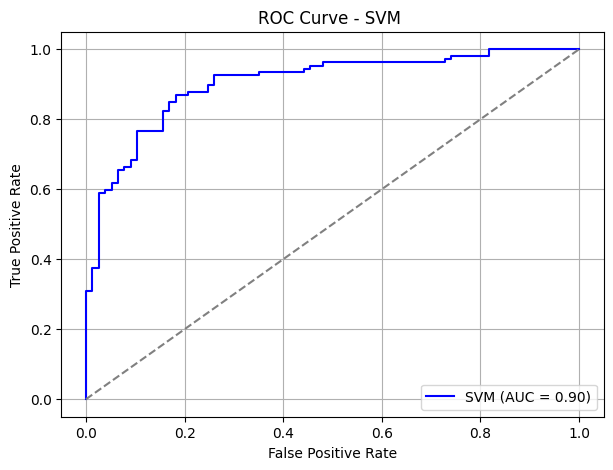

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = svm_model.predict_proba(X_test)[:, 1]

# ROC curve values
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM ")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [148]:
print("Model Accuracy Comparison:\n")

print(f" Logistic Regression Accuracy:     {accuracy_score(y_test, y_pred):.4f}")
print(f" Decision Tree Accuracy:           {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"Random Forest Accuracy:           {accuracy_score(y_test,  y_pred_rf):.4f}")
print(f" SVM Accuracy:                      {accuracy_score(y_test, y_pred_svm):.4f}")


Model Accuracy Comparison:

 Logistic Regression Accuracy:     0.8043
 Decision Tree Accuracy:           0.7772
Random Forest Accuracy:           0.8478
 SVM Accuracy:                      0.8315


------------------------------------------------------

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop the target column ('HeartDisease') since clustering is unsupervised
X_cluster = final_df.drop("HeartDisease", axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


K-Mean

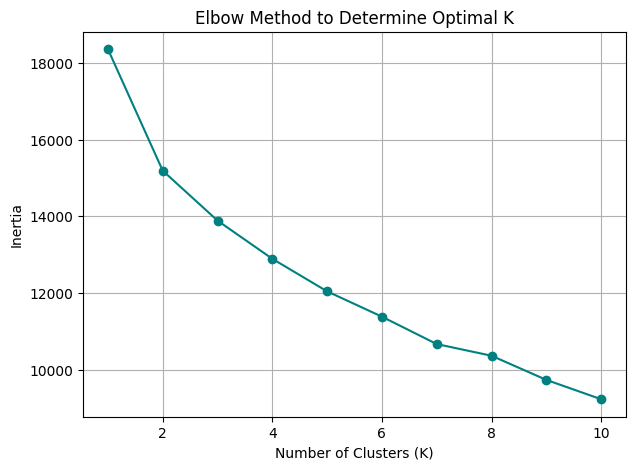

In [150]:
# Try different values of K (number of clusters)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve (Inertia vs K)
plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia, marker='o', color='teal')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal K")
plt.grid(True)
plt.show()


 In this case, K = 2 appears to be a reasonable choice

In [157]:
# Apply KMeans with chosen number of clusters (2)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to the original dataframe
final_df['Cluster'] = clusters
final_df[['Cluster']].head()


,Cluster
0,1
1,1
2,1
3,0
4,1


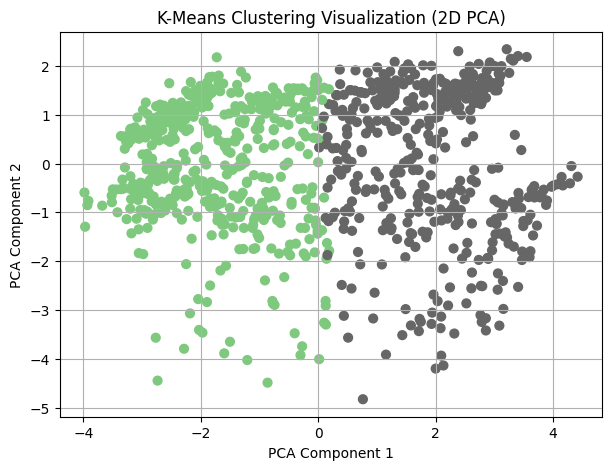

In [158]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Accent', s=40)
plt.title("K-Means Clustering Visualization (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


Compare clusters with actual disease labels. 

In [161]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cluster labels from K-Means
cluster_labels = final_df['Cluster'].values

# True labels from dataset
true_labels = final_df['HeartDisease'].values

# KMeans gives clusters arbitrarily (0 or 1), so we check both mappings
acc1 = accuracy_score(true_labels, cluster_labels)
acc2 = accuracy_score(true_labels, 1 - cluster_labels)

# Pick the best accuracy
best_accuracy = max(acc1, acc2)
best_clusters = cluster_labels if acc1 > acc2 else 1 - cluster_labels

# Print accuracy
print(f" Clustering Accuracy vs. HeartDisease: {best_accuracy:.4f}")

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, best_clusters))

# Optional: classification report
print("\n Classification Report:")
print(classification_report(true_labels, best_clusters))


 Clustering Accuracy vs. HeartDisease: 0.8486

Confusion Matrix:
[[350  60]
 [ 79 429]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       410
           1       0.88      0.84      0.86       508

    accuracy                           0.85       918
   macro avg       0.85      0.85      0.85       918
weighted avg       0.85      0.85      0.85       918



Hierarchical Clustering 

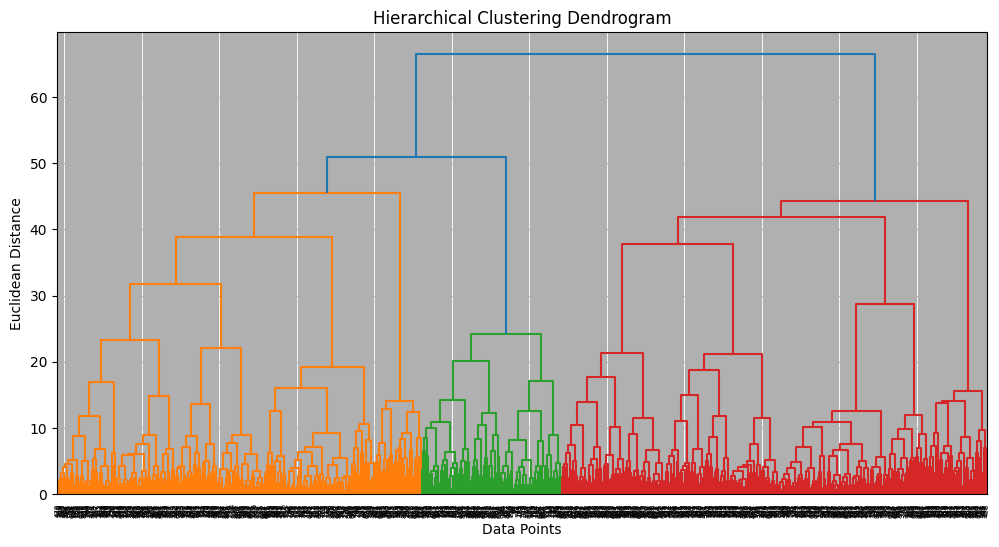

In [162]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#  drop target column
X_hier = final_df.drop(['HeartDisease', 'Cluster'], axis=1)

#  Standardize 
scaler = StandardScaler()
X_scaled_hier = scaler.fit_transform(X_hier)

#  Compute the linkage matrix 
linked = linkage(X_scaled_hier, method='ward')

#  Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()


In [165]:
#  cut the dendrogram into 9 clusters
clusters_hier = fcluster(linked, t=9, criterion='maxclust')

# Add the clusters to the dataframe
final_df['HierCluster'] = clusters_hier
final_df[['HierCluster']].head()


,HierCluster
0,7
1,5
2,7
3,2
4,8


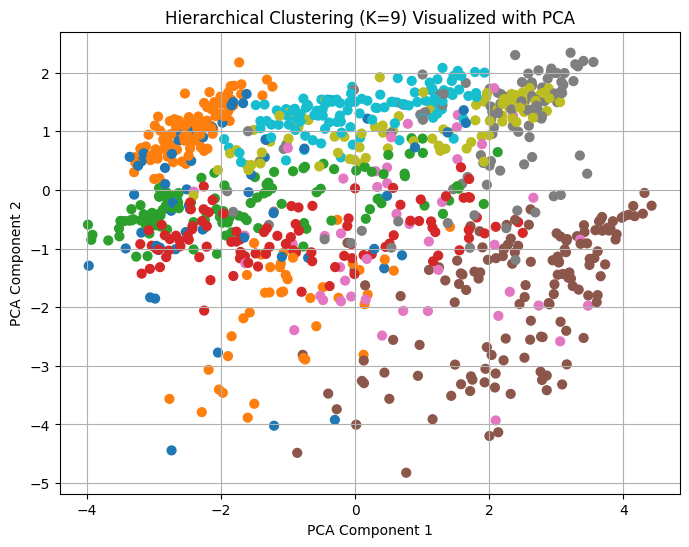

In [168]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_hier)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_df['HierCluster'], cmap='tab10', s=40)
plt.title("Hierarchical Clustering (K=9) Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


Compare clusters with actual disease labels. 


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd

#  Create mapping from cluster to most common HeartDisease label
mapping = {}
for cluster_id in sorted(final_df['HierCluster'].unique()):
    # Get the true labels for current cluster
    true_vals = final_df[final_df['HierCluster'] == cluster_id]['HeartDisease']
    # Find the most common label
    majority_label = true_vals.value_counts().idxmax()
    mapping[cluster_id] = majority_label

#  Map predicted cluster labels to true labels
predicted_labels = final_df['HierCluster'].map(mapping)

# Calculate accuracy
accuracy = accuracy_score(final_df['HeartDisease'], predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

#  Confusion Matrix
conf_matrix = confusion_matrix(final_df['HeartDisease'], predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7789
Confusion Matrix:
[[294 116]
 [ 87 421]]
